In [1]:
import pydotplus
import pandas as pd
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from Packages.LearningModel import ReplaceClassifier 

In [2]:
allInformation =  pd.read_csv("Datasets/Diabetes_Diagnosis.csv")
allInformation.diabetes = allInformation.diabetes.apply(ReplaceClassifier)
cols = ['num_preg','glucose_conc',
        'diastolic_bp','thickness',
        'insulin','bmi','age','skin','diab_pred']

In [3]:
x = allInformation[cols]
y = allInformation.diabetes
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 1)

In [4]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

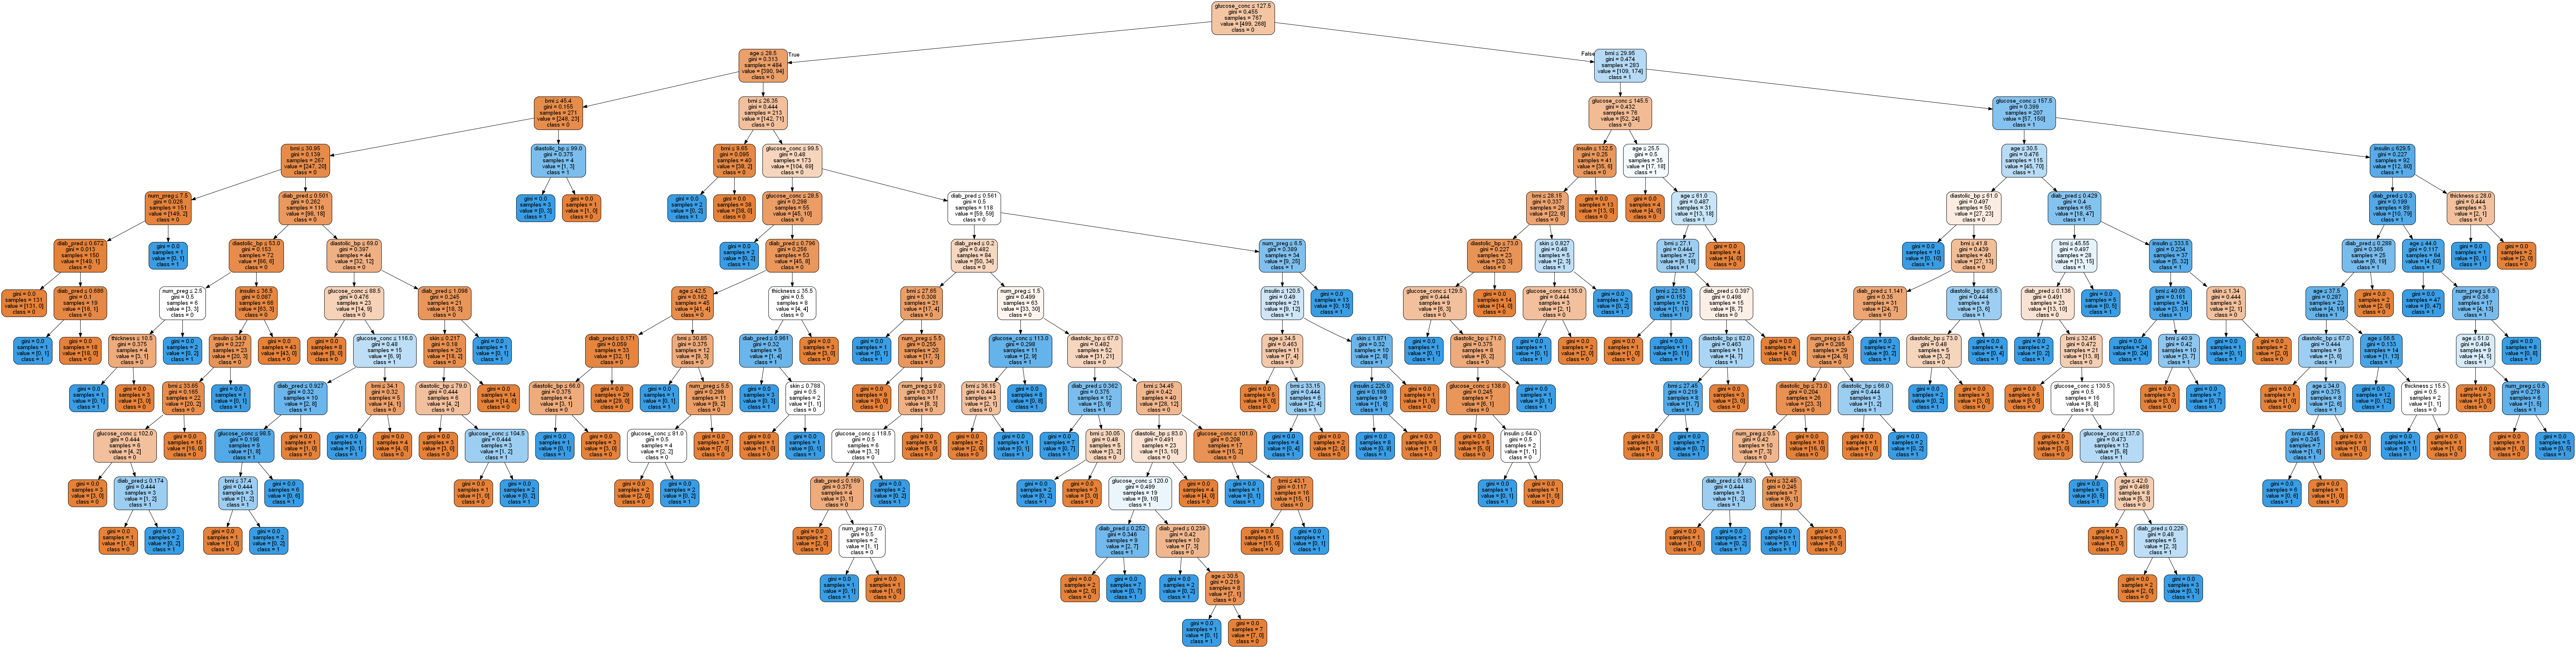

In [5]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Exports/DecisionTree.png')
Image(graph.create_png())